In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
sns.set_style('whitegrid')
sns.set_palette('rainbow')

In [4]:
titanic = sns.load_dataset('titanic')

array([[<Axes: title={'center': 'fare'}>]], dtype=object)

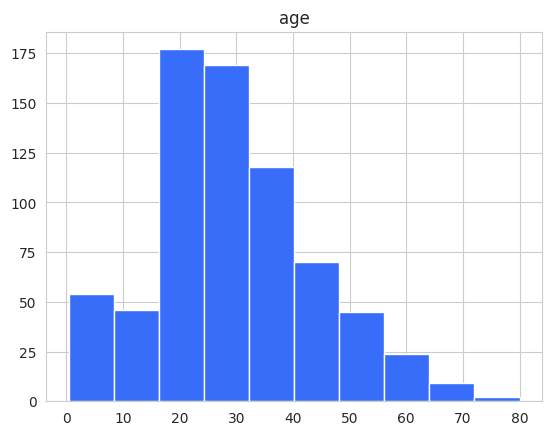

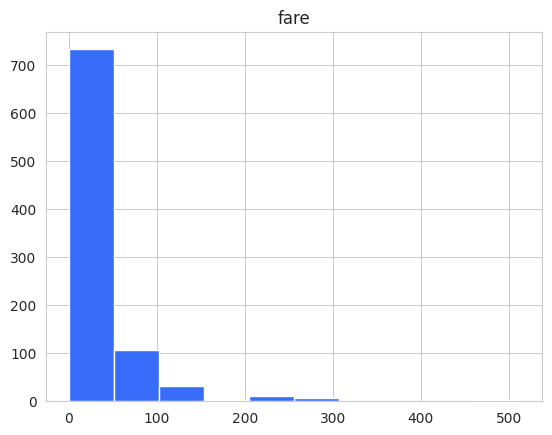

In [8]:
titanic.head()
titanic.hist('age')
titanic.hist('fare')

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: xlabel='age', ylabel='fare'>

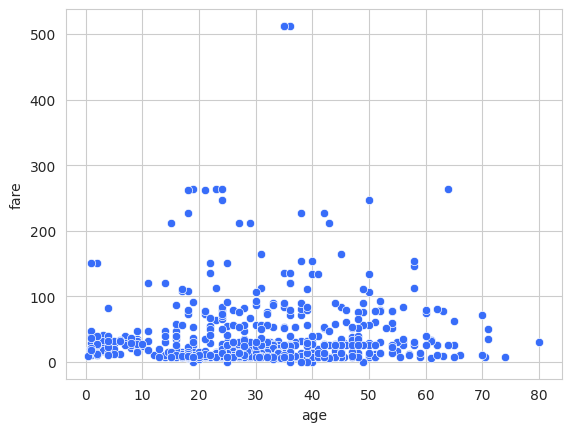

In [9]:
sns.scatterplot(data=titanic, y='fare',x='age')

<ipython-input-10-c853c42ce68e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = titanic.corr()


<Axes: >

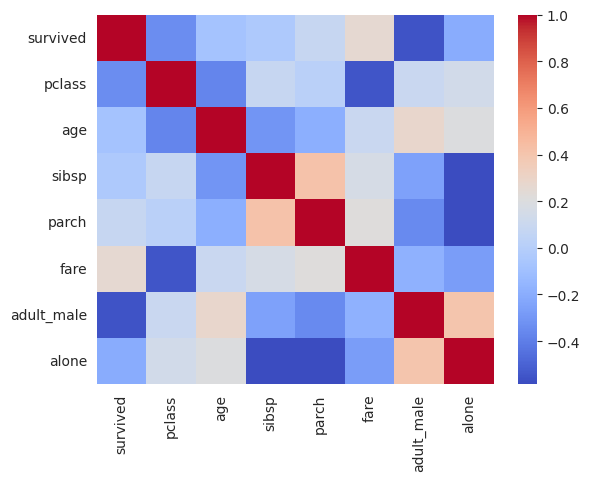

In [10]:
cor = titanic.corr()
sns.heatmap(cor, cmap='coolwarm')

In [24]:
from sklearn.model_selection import train_test_split

#imputación de datos para numericas promedio y para categoricas la moda
mean_age = titanic.age.mean()
titanic.age = titanic.age.fillna(mean_age)

X= titanic.age
y= titanic.fare

X_train, X_test, y_train, y_test = (train_test_split(X, y, test_size=0.33, random_state=42))


In [25]:
#Algorítmo que estamos entrenando
model = sm.OLS(y_train,X_train).fit()

In [30]:
#Sirve para identificar que valores están vacíos o que no hay
X.isnull().sum()
y.isnull().sum()

0

In [28]:
#Conjunto de prueba
#Basado en la edad esto es lo que pagaron las personas
model.predict(X_test)

709    28.579292
439    29.831124
840    19.245886
720     5.773766
39     13.472120
         ...    
715    18.283592
525    38.972919
381     0.962294
140    28.579292
173    20.208180
Length: 295, dtype: float64

In [26]:
y_pred = model.predict(X_test)

<Axes: xlabel='age', ylabel='fare'>

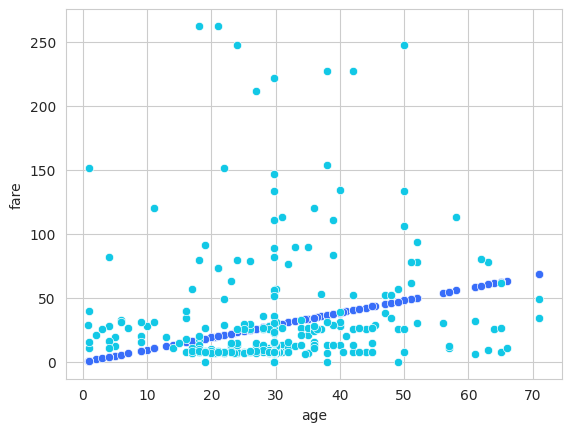

In [27]:
sns.scatterplot(x=X_test,y=y_pred)
sns.scatterplot(x=X_test,y=y_test)

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   fare   R-squared (uncentered):                   0.263
Model:                            OLS   Adj. R-squared (uncentered):              0.262
Method:                 Least Squares   F-statistic:                              212.4
Date:                Tue, 13 Jun 2023   Prob (F-statistic):                    2.27e-41
Time:                        16:16:11   Log-Likelihood:                         -3200.2
No. Observations:                 596   AIC:                                      6402.
Df Residuals:                     595   BIC:                                      6407.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.9623      0.066     14.575      0.000       0.833       1.092
==============================================================================
Omnibus:                      647.426   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36905.454
Skew:                           5.085   Prob(JB):                         0.00
Kurtosis:                      40.185   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""